In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from keras.optimizers import Adam
from keras.utils import to_categorical

# DADOS

In [2]:
xt = np.load("Dados/Xtrain_Classification1.npy") 
yt = np.load("Dados/ytrain_Classification1.npy")
yt = to_categorical(yt,2)

scalerx = MinMaxScaler().fit(xt)
xScaled = scalerx.transform(xt)
# scalerx = StandardScaler().fit(xt)
# xScaled = scalerx.transform(xt)
# oi = (xt).reshape(-1,28,28,3)
# for i in oi[0:1]:
#     plt.imshow(i)
#     plt.show()
# oi = (xScaled).reshape(-1,28,28,3)
# for i in oi[0:1]:
#     plt.imshow(i)
#     plt.show()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(xScaled, yt, test_size=0.1, shuffle=True)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.3, shuffle=True)
counterx=0
countery=0
increment = 4
add = []
for idx, i in enumerate(y_train):
        if i[1] == 1:
            counterx += increment
            for k in range(0, increment-1):
                y_train = np.vstack((y_train, i))
                add = np.append(add, X_train[idx, :])
        else: 
             countery += 1
X_train = np.append(X_train, add)
print(counterx/(counterx+countery), countery/(counterx+countery), counterx, countery)

0.4021276595744681 0.597872340425532 2268 3372


# Apenas para ver as imagens

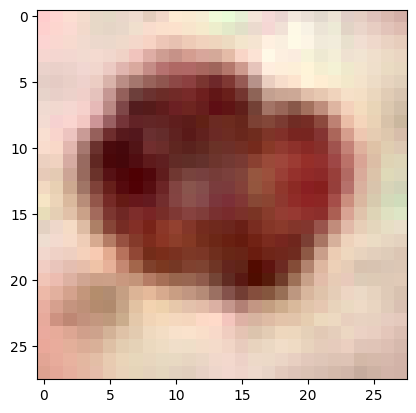

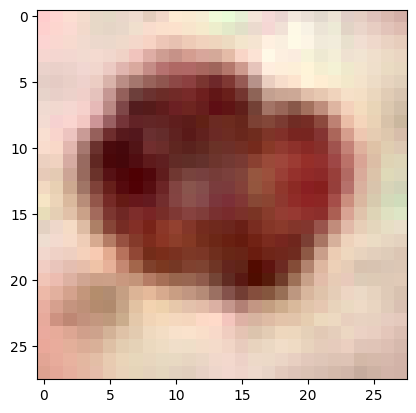

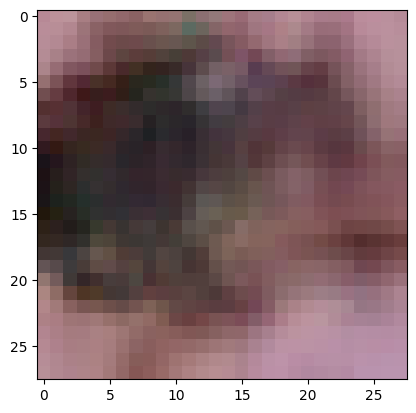

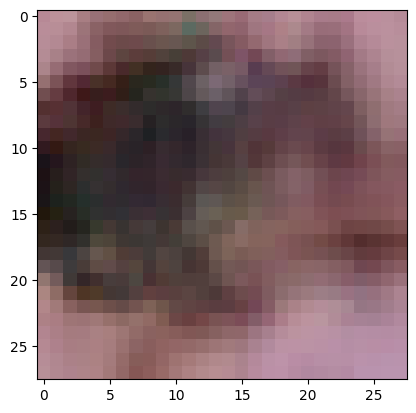

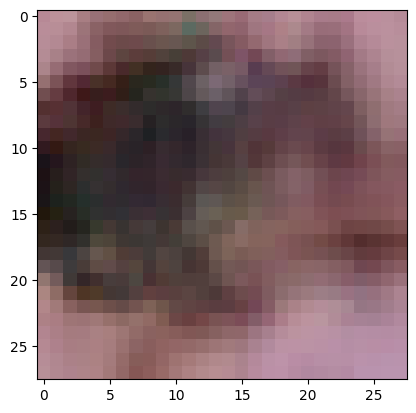

In [4]:
oi = X_train.reshape(-1,28,28,3)
for i in oi[-1:]:
    plt.imshow(i)
    plt.show()

# Código da Neural Network

In [25]:
MLP = Sequential()
MLP.add(Convolution2D(32, (3,3), input_shape=(28,28,3), activation='relu', padding='same'))
MLP.add(MaxPooling2D(pool_size=(2,2), strides = 2))
MLP.add(Convolution2D(64, (3,3), activation='relu',padding='same'))
MLP.add(MaxPooling2D(pool_size=(2,2), strides = 2))
MLP.add(Flatten()) 
MLP.add(Dense(32, activation='relu'))
MLP.add(Dense(2, activation='softmax'))
X_testrs = X_test.reshape(-1, 28,28,3)
X_trainrs = X_train.reshape(-1, 28,28,3)
X_validationrs = X_validation.reshape(-1, 28,28,3)

In [26]:
# MLP = Sequential()
# MLP.add(Dense(64,input_dim=28*28*3, activation='relu'))
# MLP.add(Dense(32, activation='relu'))
# MLP.add(Dense(2, activation='softmax'))
#X_trainrs = X_train.reshape(-1, 28*28*3)

In [27]:
#MLP.summary()

In [28]:
MLP.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy', 'mse'])

In [29]:
callback = EarlyStopping(monitor='val_loss', patience=8, mode='auto', verbose=1, restore_best_weights=True, min_delta=0.0001)
hist = MLP.fit(x=X_trainrs, y=y_train, epochs=50, validation_data=(X_validationrs, y_validation), verbose=2, batch_size=200, callbacks=[callback])

Epoch 1/50
29/29 - 4s - loss: 0.6328 - accuracy: 0.6037 - mse: 0.2218 - val_loss: 0.4482 - val_accuracy: 0.7756 - val_mse: 0.1439 - 4s/epoch - 127ms/step
Epoch 2/50
29/29 - 3s - loss: 0.5542 - accuracy: 0.6702 - mse: 0.1916 - val_loss: 0.4934 - val_accuracy: 0.6069 - val_mse: 0.1721 - 3s/epoch - 97ms/step
Epoch 3/50
29/29 - 3s - loss: 0.5154 - accuracy: 0.7059 - mse: 0.1780 - val_loss: 0.4659 - val_accuracy: 0.6223 - val_mse: 0.1603 - 3s/epoch - 104ms/step
Epoch 4/50
29/29 - 3s - loss: 0.4866 - accuracy: 0.7207 - mse: 0.1670 - val_loss: 0.4714 - val_accuracy: 0.6193 - val_mse: 0.1684 - 3s/epoch - 99ms/step
Epoch 5/50
29/29 - 3s - loss: 0.4634 - accuracy: 0.7535 - mse: 0.1572 - val_loss: 0.5187 - val_accuracy: 0.6382 - val_mse: 0.1858 - 3s/epoch - 103ms/step
Epoch 6/50
29/29 - 3s - loss: 0.4509 - accuracy: 0.7645 - mse: 0.1527 - val_loss: 0.4586 - val_accuracy: 0.6969 - val_mse: 0.1652 - 3s/epoch - 97ms/step
Epoch 7/50
29/29 - 3s - loss: 0.4521 - accuracy: 0.7686 - mse: 0.1530 - val_los

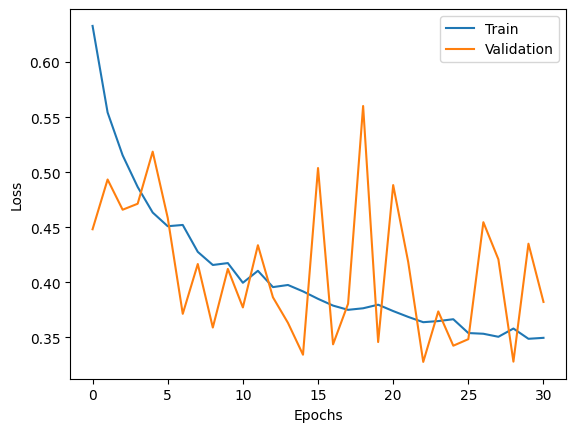

In [30]:
plotx = hist.history['loss']
plotty = hist.history['val_loss']
plt.plot(plotx)
plt.plot(plotty)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

In [31]:
from sklearn.metrics import f1_score
y_pred = MLP.predict(X_testrs, verbose=0)
y_pred = np.argmax(y_pred, axis=1)
MLP.evaluate(X_testrs, y_test, verbose=1)
y_comp = np.argmax(y_test, axis=1)
print("F1 ->", f1_score(y_comp, y_pred))


20/20 [==============================] - 0s 7ms/step - loss: 0.3074 - accuracy: 0.8658 - mse: 0.1014
F1 -> 0.5625


In [32]:
counter = 0
for i in range(len(y_comp)):
    if(y_pred[i] != y_comp[i]):
        #print(i, "\t", y_pred[i], "\t", y_test[i])
        counter+=1
counter

84

In [33]:
tn, fp, fn, tp = confusion_matrix(y_comp, y_pred).ravel()
tn, fp, fn, tp

(488, 50, 34, 54)